In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
import torch.nn.functional as F
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import classifier_util as util
from classifier_util import BATCH_SIZE, NCLASSES, N_EPOCHS
from classifier import SingleConvClassifier

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Initialization

In [9]:
# Read DataLoaders from pickle files
pkl_file = open('Data/dataLoaderVal.pkl', 'rb')
dl_val = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('Data/dataLoaderTrain.pkl', 'rb')
dl_train = pickle.load(pkl_file)
pkl_file.close()

## Training

In [9]:
# Training and plotting that uses validation data
def train_classification_with_validation(model, criterion, optimizer, number_of_epochs, train_loader, validation_loader):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    device = util.get_device()

    for epoch in range(number_of_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            predicted = torch.argmax(outputs, dim=1)

            total += labels.size(0)
            
            correct += sum([int(int(labels[ind][val])==1) for ind, val in enumerate(predicted)])

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_accuracy = correct / total
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)
        print(f"Epoch [{epoch + 1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}")

        if validation_loader:
            model.eval()
            val_running_loss = 0.0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for val_inputs, val_labels in validation_loader:
                    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                    val_outputs = model(val_inputs)
                    val_loss = criterion(val_outputs.squeeze(), val_labels)
                    val_running_loss += val_loss.item()

                    val_predicted = torch.argmax(val_outputs, dim=1)
         
                    val_total += val_labels.size(0)
                    val_correct += sum([int(int(val_labels[ind][val])==1) for ind, val in enumerate(val_predicted)])

            epoch_val_loss = val_running_loss / len(validation_loader)
            epoch_val_accuracy = val_correct / val_total
            val_losses.append(epoch_val_loss)
            val_accuracies.append(epoch_val_accuracy)
            print(f"Epoch [{epoch + 1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies

In [10]:
m1 = SingleConvClassifier(NCLASSES)
m1 = util.bind_gpu(m1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(m1.parameters(), weight_decay=0.01)

train_losses_m1, train_accuracies_m1, val_losses_m1, val_accuracies_m1 = train_classification_with_validation(m1, criterion, optimizer, N_EPOCHS, dl_train, dl_val)

Epoch [1/30], Train Loss: 1.9710, Train Accuracy: 0.3263
Epoch [1/30], Validation Loss: 1.7049, Validation Accuracy: 0.4462
Epoch [2/30], Train Loss: 1.5982, Train Accuracy: 0.4631
Epoch [2/30], Validation Loss: 1.4142, Validation Accuracy: 0.5393
Epoch [3/30], Train Loss: 1.4509, Train Accuracy: 0.5123
Epoch [3/30], Validation Loss: 1.2882, Validation Accuracy: 0.5807
Epoch [4/30], Train Loss: 1.3427, Train Accuracy: 0.5533
Epoch [4/30], Validation Loss: 1.3080, Validation Accuracy: 0.5814
Epoch [5/30], Train Loss: 1.2666, Train Accuracy: 0.5793
Epoch [5/30], Validation Loss: 1.3299, Validation Accuracy: 0.5331
Epoch [6/30], Train Loss: 1.2076, Train Accuracy: 0.6034
Epoch [6/30], Validation Loss: 1.0934, Validation Accuracy: 0.6345
Epoch [7/30], Train Loss: 1.1493, Train Accuracy: 0.6209
Epoch [7/30], Validation Loss: 1.0760, Validation Accuracy: 0.6407
Epoch [8/30], Train Loss: 1.0819, Train Accuracy: 0.6407
Epoch [8/30], Validation Loss: 1.0582, Validation Accuracy: 0.6559
Epoch [9

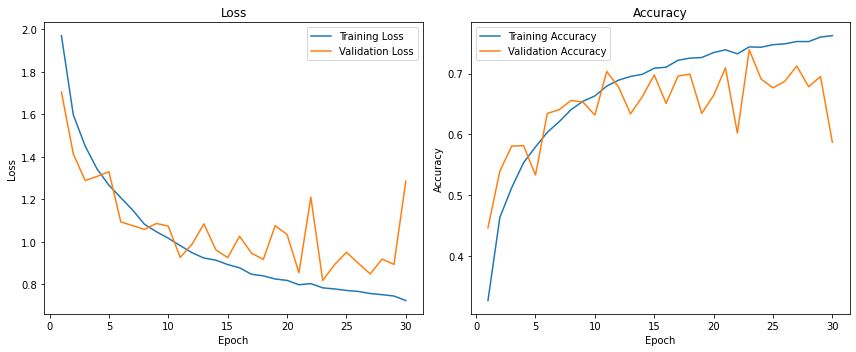

In [12]:
util.plot_classification(train_losses_m1, train_accuracies_m1, val_losses_m1, val_accuracies_m1)

In [13]:
# save model
torch.save(m1, 'Models/m1_full.pth')
torch.save(m1.state_dict(), 'Models/m1.pth')

In [ ]:
# load saved model
m1_loaded = torch.load('Models/m1_full.pth')

In [14]:
m2 = SingleConvClassifier(NCLASSES)
m2 = util.bind_gpu(m2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(m2.parameters(), weight_decay=0.05, lr=0.0003)

train_losses_m2, train_accuracies_m2, val_losses_m2, val_accuracies_m2 = train_classification_with_validation(m2, criterion, optimizer, N_EPOCHS, dl_train, dl_val)

Epoch [1/30], Train Loss: 2.0327, Train Accuracy: 0.2945
Epoch [1/30], Validation Loss: 1.8442, Validation Accuracy: 0.3903
Epoch [2/30], Train Loss: 1.7236, Train Accuracy: 0.4268
Epoch [2/30], Validation Loss: 1.5611, Validation Accuracy: 0.4959
Epoch [3/30], Train Loss: 1.5730, Train Accuracy: 0.4817
Epoch [3/30], Validation Loss: 1.5071, Validation Accuracy: 0.4993
Epoch [4/30], Train Loss: 1.4798, Train Accuracy: 0.5182
Epoch [4/30], Validation Loss: 1.4964, Validation Accuracy: 0.5166
Epoch [5/30], Train Loss: 1.4147, Train Accuracy: 0.5417
Epoch [5/30], Validation Loss: 1.4082, Validation Accuracy: 0.5517
Epoch [6/30], Train Loss: 1.3841, Train Accuracy: 0.5560
Epoch [6/30], Validation Loss: 1.3398, Validation Accuracy: 0.5917
Epoch [7/30], Train Loss: 1.3379, Train Accuracy: 0.5740
Epoch [7/30], Validation Loss: 1.3940, Validation Accuracy: 0.5421
Epoch [8/30], Train Loss: 1.3085, Train Accuracy: 0.5805
Epoch [8/30], Validation Loss: 1.2920, Validation Accuracy: 0.5793
Epoch [9

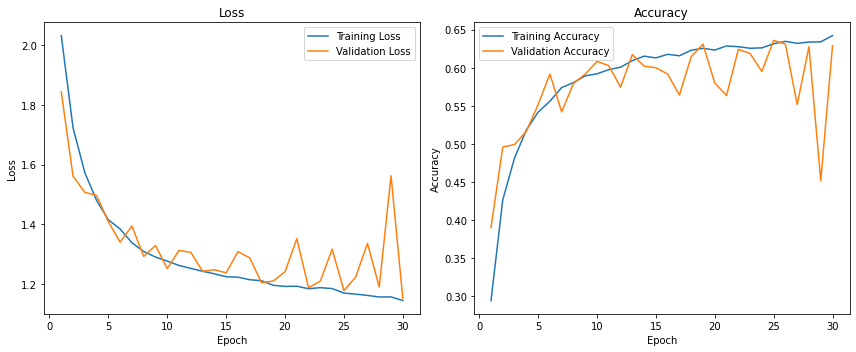

In [15]:
util.plot_classification(train_losses_m2, train_accuracies_m2, val_losses_m2, val_accuracies_m2)

In [19]:
m3 = SingleConvClassifier(NCLASSES)
m3 = util.bind_gpu(m3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(m3.parameters(), weight_decay=0.025, lr=0.0005)

train_losses_m3, train_accuracies_m3, val_losses_m3, val_accuracies_m3 = train_classification_with_validation(m3, criterion, optimizer, N_EPOCHS, dl_train, dl_val)

Epoch [1/30], Train Loss: 1.9512, Train Accuracy: 0.3290
Epoch [1/30], Validation Loss: 1.6845, Validation Accuracy: 0.4276
Epoch [2/30], Train Loss: 1.5951, Train Accuracy: 0.4684
Epoch [2/30], Validation Loss: 1.5212, Validation Accuracy: 0.4793
Epoch [3/30], Train Loss: 1.4471, Train Accuracy: 0.5217
Epoch [3/30], Validation Loss: 1.3103, Validation Accuracy: 0.5703
Epoch [4/30], Train Loss: 1.3300, Train Accuracy: 0.5589
Epoch [4/30], Validation Loss: 1.3207, Validation Accuracy: 0.5738
Epoch [5/30], Train Loss: 1.2683, Train Accuracy: 0.5819
Epoch [5/30], Validation Loss: 1.1951, Validation Accuracy: 0.6310
Epoch [6/30], Train Loss: 1.1988, Train Accuracy: 0.6062
Epoch [6/30], Validation Loss: 1.2299, Validation Accuracy: 0.6007
Epoch [7/30], Train Loss: 1.1725, Train Accuracy: 0.6218
Epoch [7/30], Validation Loss: 1.1543, Validation Accuracy: 0.6166
Epoch [8/30], Train Loss: 1.1286, Train Accuracy: 0.6339
Epoch [8/30], Validation Loss: 1.1908, Validation Accuracy: 0.5848
Epoch [9

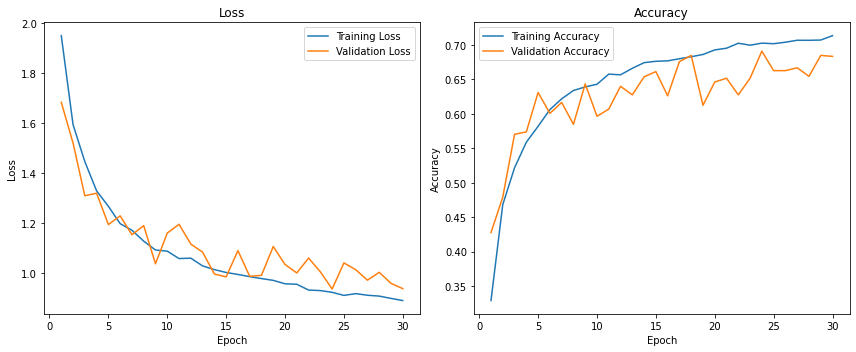

In [20]:
util.plot_classification(train_losses_m3, train_accuracies_m3, val_losses_m3, val_accuracies_m3)

In [21]:
# save model
torch.save(m3, 'Models/m3_full.pth')
torch.save(m3.state_dict(), 'Models/m3.pth')

In [22]:
m4 = SingleConvClassifier(NCLASSES)
m4 = util.bind_gpu(m4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(m4.parameters(), weight_decay=0.04, lr=0.0004)

train_losses_m4, train_accuracies_m4, val_losses_m4, val_accuracies_m4 = train_classification_with_validation(m4, criterion, optimizer, N_EPOCHS, dl_train, dl_val)

Epoch [1/30], Train Loss: 1.9994, Train Accuracy: 0.3101
Epoch [1/30], Validation Loss: 1.7680, Validation Accuracy: 0.4076
Epoch [2/30], Train Loss: 1.6342, Train Accuracy: 0.4504
Epoch [2/30], Validation Loss: 1.5130, Validation Accuracy: 0.4917
Epoch [3/30], Train Loss: 1.5034, Train Accuracy: 0.5026
Epoch [3/30], Validation Loss: 1.4677, Validation Accuracy: 0.5186
Epoch [4/30], Train Loss: 1.4312, Train Accuracy: 0.5295
Epoch [4/30], Validation Loss: 1.4699, Validation Accuracy: 0.5372
Epoch [5/30], Train Loss: 1.3773, Train Accuracy: 0.5527
Epoch [5/30], Validation Loss: 1.2999, Validation Accuracy: 0.5779
Epoch [6/30], Train Loss: 1.3384, Train Accuracy: 0.5617
Epoch [6/30], Validation Loss: 1.3269, Validation Accuracy: 0.5855
Epoch [7/30], Train Loss: 1.3020, Train Accuracy: 0.5749
Epoch [7/30], Validation Loss: 1.3182, Validation Accuracy: 0.5807
Epoch [8/30], Train Loss: 1.2741, Train Accuracy: 0.5867
Epoch [8/30], Validation Loss: 1.2539, Validation Accuracy: 0.6034
Epoch [9

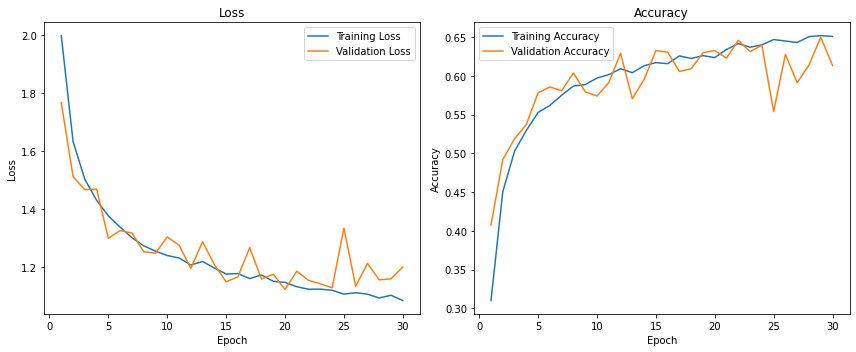

In [23]:
util.plot_classification(train_losses_m4, train_accuracies_m4, val_losses_m4, val_accuracies_m4)

In [24]:
# save model
torch.save(m4, 'Models/m4_full.pth')
torch.save(m4.state_dict(), 'Models/m4.pth')

In [25]:
m5 = SingleConvClassifier(NCLASSES)
m5 = util.bind_gpu(m5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(m5.parameters(), weight_decay=0.04, lr=0.0004)
nepoch = 24

train_losses_m5, train_accuracies_m5, val_losses_m5, val_accuracies_m5 = train_classification_with_validation(m5, criterion, optimizer, nepoch, dl_train, dl_val)

Epoch [1/24], Train Loss: 1.9863, Train Accuracy: 0.3167
Epoch [1/24], Validation Loss: 1.7560, Validation Accuracy: 0.4021
Epoch [2/24], Train Loss: 1.6578, Train Accuracy: 0.4436
Epoch [2/24], Validation Loss: 1.4640, Validation Accuracy: 0.5545
Epoch [3/24], Train Loss: 1.5018, Train Accuracy: 0.5020
Epoch [3/24], Validation Loss: 1.4374, Validation Accuracy: 0.5200
Epoch [4/24], Train Loss: 1.3957, Train Accuracy: 0.5422
Epoch [4/24], Validation Loss: 1.3090, Validation Accuracy: 0.5545
Epoch [5/24], Train Loss: 1.3255, Train Accuracy: 0.5746
Epoch [5/24], Validation Loss: 1.3539, Validation Accuracy: 0.5476
Epoch [6/24], Train Loss: 1.2987, Train Accuracy: 0.5799
Epoch [6/24], Validation Loss: 1.3865, Validation Accuracy: 0.5200
Epoch [7/24], Train Loss: 1.2638, Train Accuracy: 0.5961
Epoch [7/24], Validation Loss: 1.2345, Validation Accuracy: 0.5945
Epoch [8/24], Train Loss: 1.2420, Train Accuracy: 0.6057
Epoch [8/24], Validation Loss: 1.2330, Validation Accuracy: 0.6090
Epoch [9

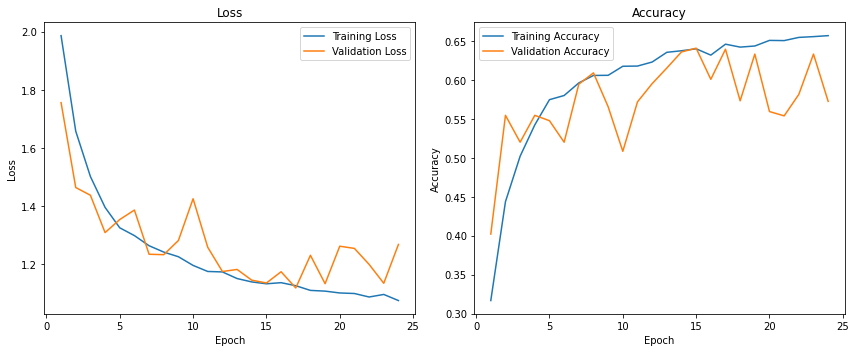

In [26]:
util.plot_classification(train_losses_m5, train_accuracies_m5, val_losses_m5, val_accuracies_m5)

### Discussion

We will perform transfer learning on multilabel classifier with m1 and m4. 
This is because m1 is the original model used in the paper and m4 appears to have the least overfitting while still keeping a decent accuracy.

#### m1

Model evaluation on: <torch.utils.data.dataloader.DataLoader object at 0x00000203F5A7DDF0>
Accuracy: 0.6855
Precision: 0.7696
Recall: 0.6855
F1 Score: 0.6937
Train Set: Loss: 0.8744, Accuracy: 0.6855


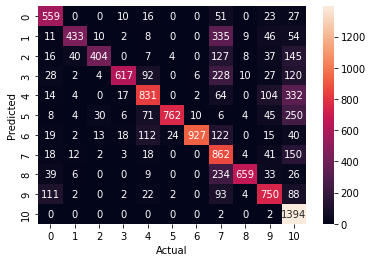

In [10]:
# load saved model
m1_loaded = torch.load('Models/m1_full.pth')
criterion = nn.CrossEntropyLoss()
util.evaluate(m1_loaded, criterion, dl_train, True)

Model evaluation on: <torch.utils.data.dataloader.DataLoader object at 0x00000203A4814D90>
Accuracy: 0.5869
Precision: 0.7122
Recall: 0.5869
F1 Score: 0.5978
Validation Set: Loss: 1.2886, Accuracy: 0.5869


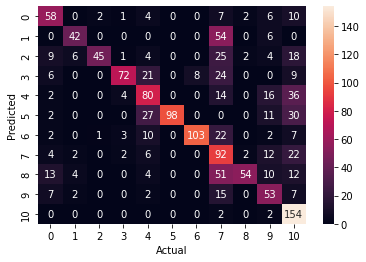

In [11]:
util.evaluate(m1_loaded, criterion, dl_val, False)

#### m4

Model evaluation on: <torch.utils.data.dataloader.DataLoader object at 0x00000203F5A7DDF0>
Accuracy: 0.6612
Precision: 0.6961
Recall: 0.6612
F1 Score: 0.6577
Train Set: Loss: 1.0584, Accuracy: 0.6612


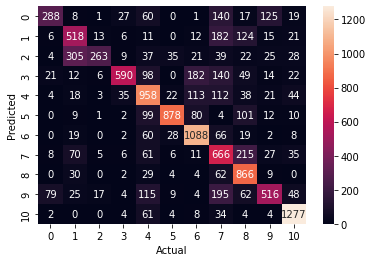

In [12]:
# load saved model
m4_loaded = torch.load('Models/m4_full.pth')
criterion = nn.CrossEntropyLoss()
util.evaluate(m4_loaded, criterion, dl_train, True)

Model evaluation on: <torch.utils.data.dataloader.DataLoader object at 0x00000203A4814D90>
Accuracy: 0.6131
Precision: 0.6632
Recall: 0.6131
F1 Score: 0.6081
Validation Set: Loss: 1.1914, Accuracy: 0.6131


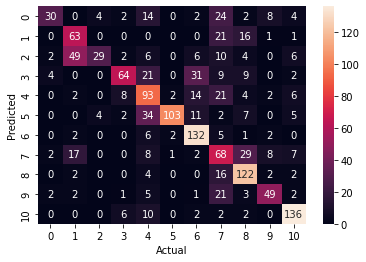

In [13]:
util.evaluate(m4_loaded, criterion, dl_val, False)